# **Analysis of the Intrusion Detection Evaluation Dataset (CIC-IDS2017)**

[Dataset Link](https://www.unb.ca/cic/datasets/ids-2017.html)

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import joblib
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE



In [27]:
# Loading the dataset
data1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Monday-WorkingHours.pcap_ISCX.csv")
data2 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Tuesday-WorkingHours.pcap_ISCX.csv")
data3 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Wednesday-workingHours.pcap_ISCX.csv")
data4 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
data5 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
data6 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Friday-WorkingHours-Morning.pcap_ISCX.csv")
data7 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
data8 = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (4)\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [28]:
data1[' Label'].unique()
data2[' Label'].unique()



array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [29]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns') 

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [30]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [31]:
data[' Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [32]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [33]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [34]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [36]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [37]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


###  Data Cleaning









In [38]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [39]:
data.drop_duplicates(inplace = True)
data.shape

(2522362, 79)

#### Identifying missing values


In [40]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    353
dtype: int64


In [41]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [42]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [43]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [44]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


#### Visualisation of missing data


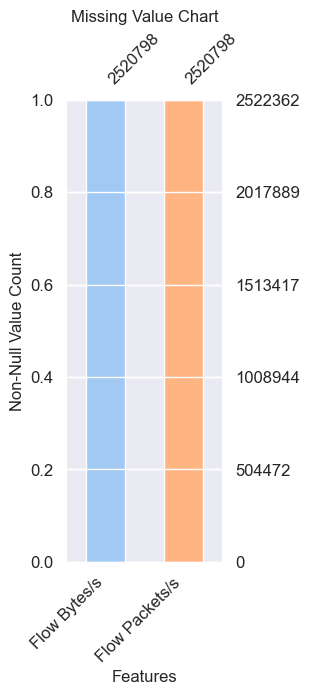

In [45]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

#### Dealing with missing values (Columns with missing data)

In [46]:
# plt.figure(figsize = (8, 3))
# sns.boxplot(x = data['Flow Bytes/s'])
# plt.xlabel('Boxplot of Flow Bytes/s')
# plt.show()

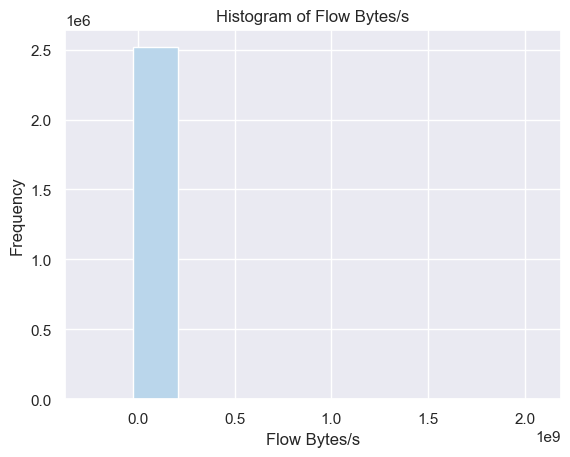

In [47]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

In [48]:
# plt.figure(figsize = (8, 3))
# sns.boxplot(x = data['Flow Packets/s'])
# plt.xlabel('Boxplot of Flow Packets/s')
# plt.show()

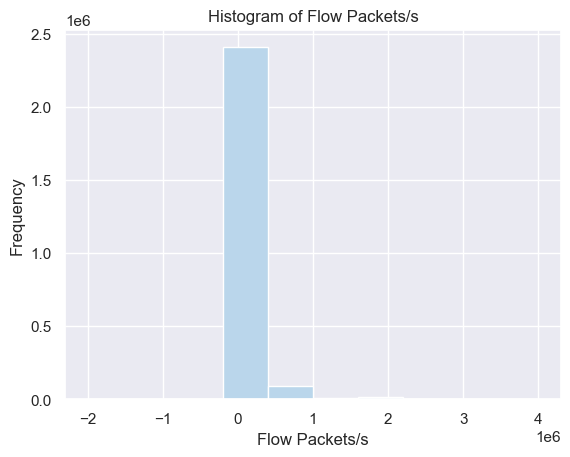

In [49]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [50]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [51]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\1818654804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\1818654804.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [52]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


### Analysing Patterns

#### Visualization of column correlation. Also, plotting Heat Map

In [53]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [54]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [55]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [56]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [57]:
data.drop('Label', axis = 1, inplace = True)

In [58]:
le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [59]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [60]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

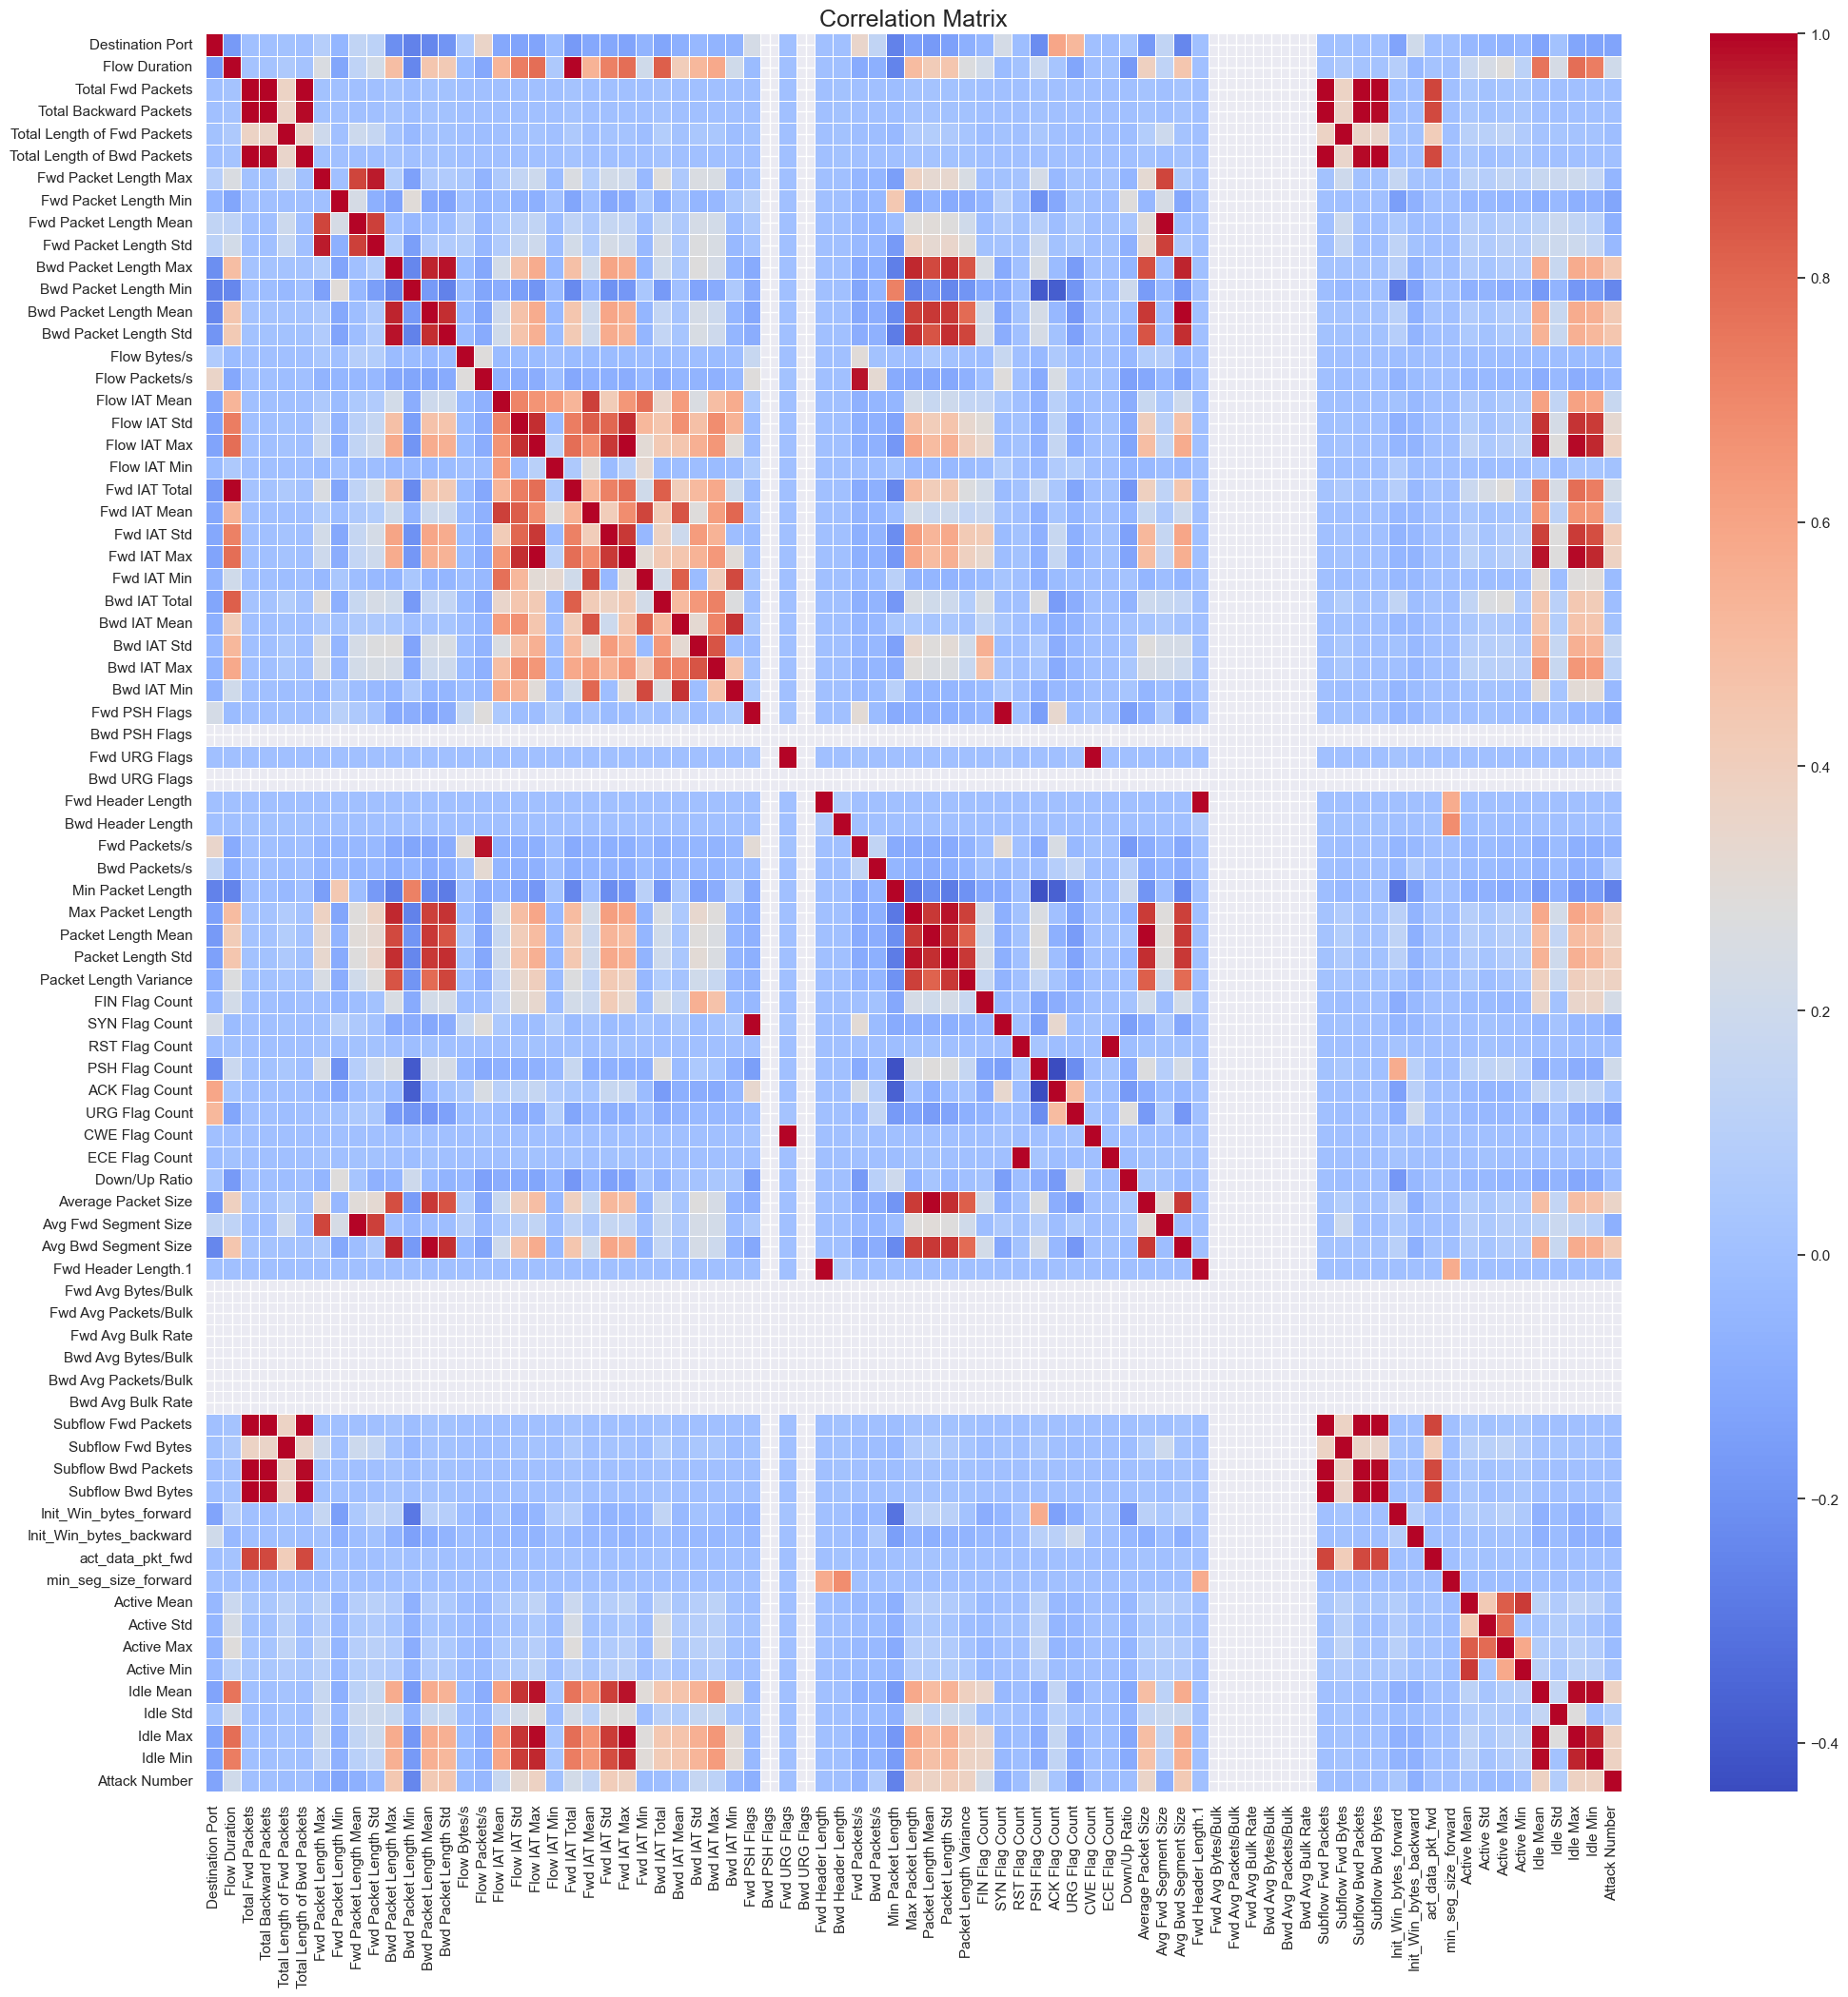

In [61]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [62]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [63]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [64]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

- We mapped each label to the corresponding attack type. This groups similar attacks together and provides an easier and more interpretable way to analyze the dataset and identify patterns in the different types of attacks.

- For plotting the correlation matrix, we encoded the 'Attack Type' column and plotted the heatmap. From the heatmap, we observe that there are many pairs of highly correlated features. Highly correlated features in the dataset are problematic and lead to overfitting. A positive correlation exists when one variable decreases as the other variable decreases or one variable increases while the other increases. There are 32 features with positive correlations that may help in predicting the target feature.

- The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

#### Linear Relationships

In [65]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504472, 80)

In [66]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.762165           8686.623973           0.21%
Flow Duration                   16581323.773163       16502842.174093       0.47%
Total Fwd Packets               10.276271             12.078062             17.53%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Total Backward Packets          11.565964             13.914412             20.30%
Total Length of Fwd Packets     611.575108            601.844586            1.59%
Total Length of Bwd Packets     18133.153930          24424.988089          34.70%
Fwd Packet Length Max           231.091768            230.009202            0.47%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Fwd Packet Length Min           19.194641             19.036484             0.82%
Fwd Packet Length Mean          63.470104             63.151403             0.50%
Fwd Packet Length Std           77.277587             76.943981             0.43%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Bwd Packet Length Max           974.370031            972.138349            0.23%
Bwd Packet Length Min           43.134670             43.163856             0.07%
Bwd Packet Length Mean          340.413252            339.881756            0.16%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].des

Bwd Packet Length Std           376.311810            375.541767            0.20%
Flow Bytes/s                    1409834.540580        1375693.683536        2.42%
Flow Packets/s                  47262.603268          46959.275688          0.64%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Flow IAT Mean                   1445245.597645        1434881.291116        0.72%
Flow IAT Std                    3276120.003337        3257837.022099        0.56%
Flow IAT Max                    10293098.691924       10240359.006934       0.51%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Flow IAT Min                    170315.698627         168061.318943         1.32%
Fwd IAT Total                   16241759.007512       16167168.269825       0.46%
Fwd IAT Mean                    2917447.144105        2890486.194242        0.92%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].des

Fwd IAT Std                     3666365.865689        3654985.852133        0.31%
Fwd IAT Max                     10136646.258398       10087693.333055       0.48%
Fwd IAT Min                     1134966.753752        1114384.505477        1.81%
Bwd IAT Total                   11103358.523806       11008442.163781       0.85%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Bwd IAT Mean                    2026476.920068        1991599.486306        1.72%
Bwd IAT Std                     1667646.690399        1647964.032406        1.18%
Bwd IAT Max                     5257357.549892        5186361.136676        1.35%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Bwd IAT Min                     1085437.767545        1061170.119216        2.24%
Fwd PSH Flags                   0.048738              0.048940              0.41%
Bwd PSH Flags                   0.000000              0.000000              0.00%
Fwd URG Flags                   0.000032              0.000040              25.00%
Bwd URG Flags                   0.000000              0.000000              0.00%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Fwd Header Length               -29182.101016         -34599.553222         18.56%
Bwd Header Length               -2553.643801          -2638.905573          3.34%
Fwd Packets/s                   40834.353243          40530.379513          0.74%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Bwd Packets/s                   6509.474728           6504.511361           0.08%
Min Packet Length               16.823494             16.784612             0.23%
Max Packet Length               1063.097507           1060.283917           0.26%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].des

Packet Length Mean              190.541501            190.115116            0.22%
Packet Length Std               329.998773            329.323962            0.20%
Packet Length Variance          545438.614758         545054.958137         0.07%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

FIN Flag Count                  0.032147              0.031760              1.20%
SYN Flag Count                  0.048738              0.048940              0.41%
RST Flag Count                  0.000272              0.000295              8.60%
PSH Flag Count                  0.297519              0.297584              0.02%
ACK Flag Count                  0.312188              0.312473              0.09%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

URG Flag Count                  0.101428              0.101284              0.14%
CWE Flag Count                  0.000032              0.000040              25.00%
ECE Flag Count                  0.000273              0.000297              8.85%
Down/Up Ratio                   0.700350              0.699849              0.07%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].des

Average Packet Size             212.311468            211.850396            0.22%
Avg Fwd Segment Size            63.470104             63.151403             0.50%
Avg Bwd Segment Size            340.413252            339.881756            0.16%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Fwd Header Length.1             -29182.101016         -34599.553222         18.56%
Fwd Avg Bytes/Bulk              0.000000              0.000000              0.00%
Fwd Avg Packets/Bulk            0.000000              0.000000              0.00%
Fwd Avg Bulk Rate               0.000000              0.000000              0.00%
Bwd Avg Bytes/Bulk              0.000000              0.000000              0.00%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Bwd Avg Packets/Bulk            0.000000              0.000000              0.00%
Bwd Avg Bulk Rate               0.000000              0.000000              0.00%
Subflow Fwd Packets             10.276271             12.078062             17.53%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Subflow Fwd Bytes               611.563349            601.844586            1.59%
Subflow Bwd Packets             11.565964             13.914412             20.30%
Subflow Bwd Bytes               18132.772274          24424.960551          34.70%
Init_Win_bytes_forward          7265.655351           7265.210957           0.01%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Init_Win_bytes_backward         2230.826079           2228.331172           0.11%
act_data_pkt_fwd                6.005904              7.205460              19.97%
min_seg_size_forward            -3080.307029          -3831.916033          24.40%
Active Mean                     91521.689172          91261.030571          0.28%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

Active Std                      46163.125326          45655.368570          1.10%
Active Max                      171910.435398         170929.317625         0.57%
Active Min                      65422.995532          65325.242775          0.15%
Idle Mean                       9331577.511171        9283624.711600        0.51%
Idle Std                        565443.316197         564295.350508         0.20%
Idle Max                        9757716.419817        9707974.839432        0.51%
Idle Min                        8887156.719966        8839664.611709        0.53%
Attack Number                   0.726480              0.731022              0.63%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\580325769.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1

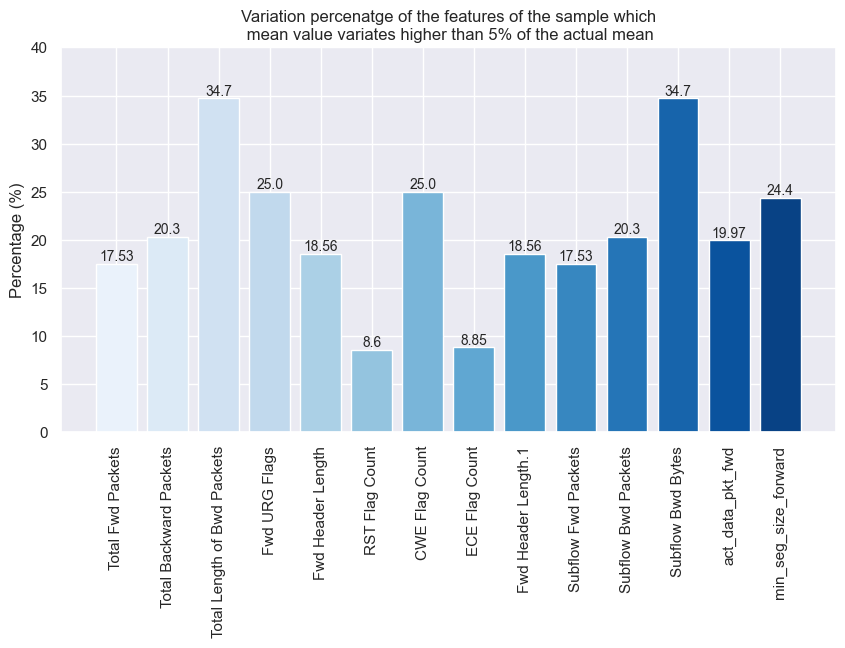

In [67]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [68]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33346
2.  Flow Duration                 : 256627
3.  Total Fwd Packets             : 659
4.  Total Backward Packets        : 820
5.  Total Length of Fwd Packets   : 9070
6.  Total Length of Bwd Packets   : 23963
7.  Fwd Packet Length Max         : 3701
8.  Fwd Packet Length Min         : 236
9.  Fwd Packet Length Mean        : 34946
10. Fwd Packet Length Std         : 66038
11. Bwd Packet Length Max         : 3936
12. Bwd Packet Length Min         : 449
13. Bwd Packet Length Mean        : 45585
14. Bwd Packet Length Std         : 62492
15. Flow Bytes/s                  : 346856
16. Flow Packets/s                : 288294
17. Flow IAT Mean                 : 274182
18. Flow IAT Std                  : 229680
19. Flow IAT Max                  : 167860
20. Flow IAT Min                  : 45941
21. Fwd IAT Total                 : 119784
22. Fwd IAT Mean                  : 164556
23. Fwd IAT Std                   : 148638
24. Fwd IAT

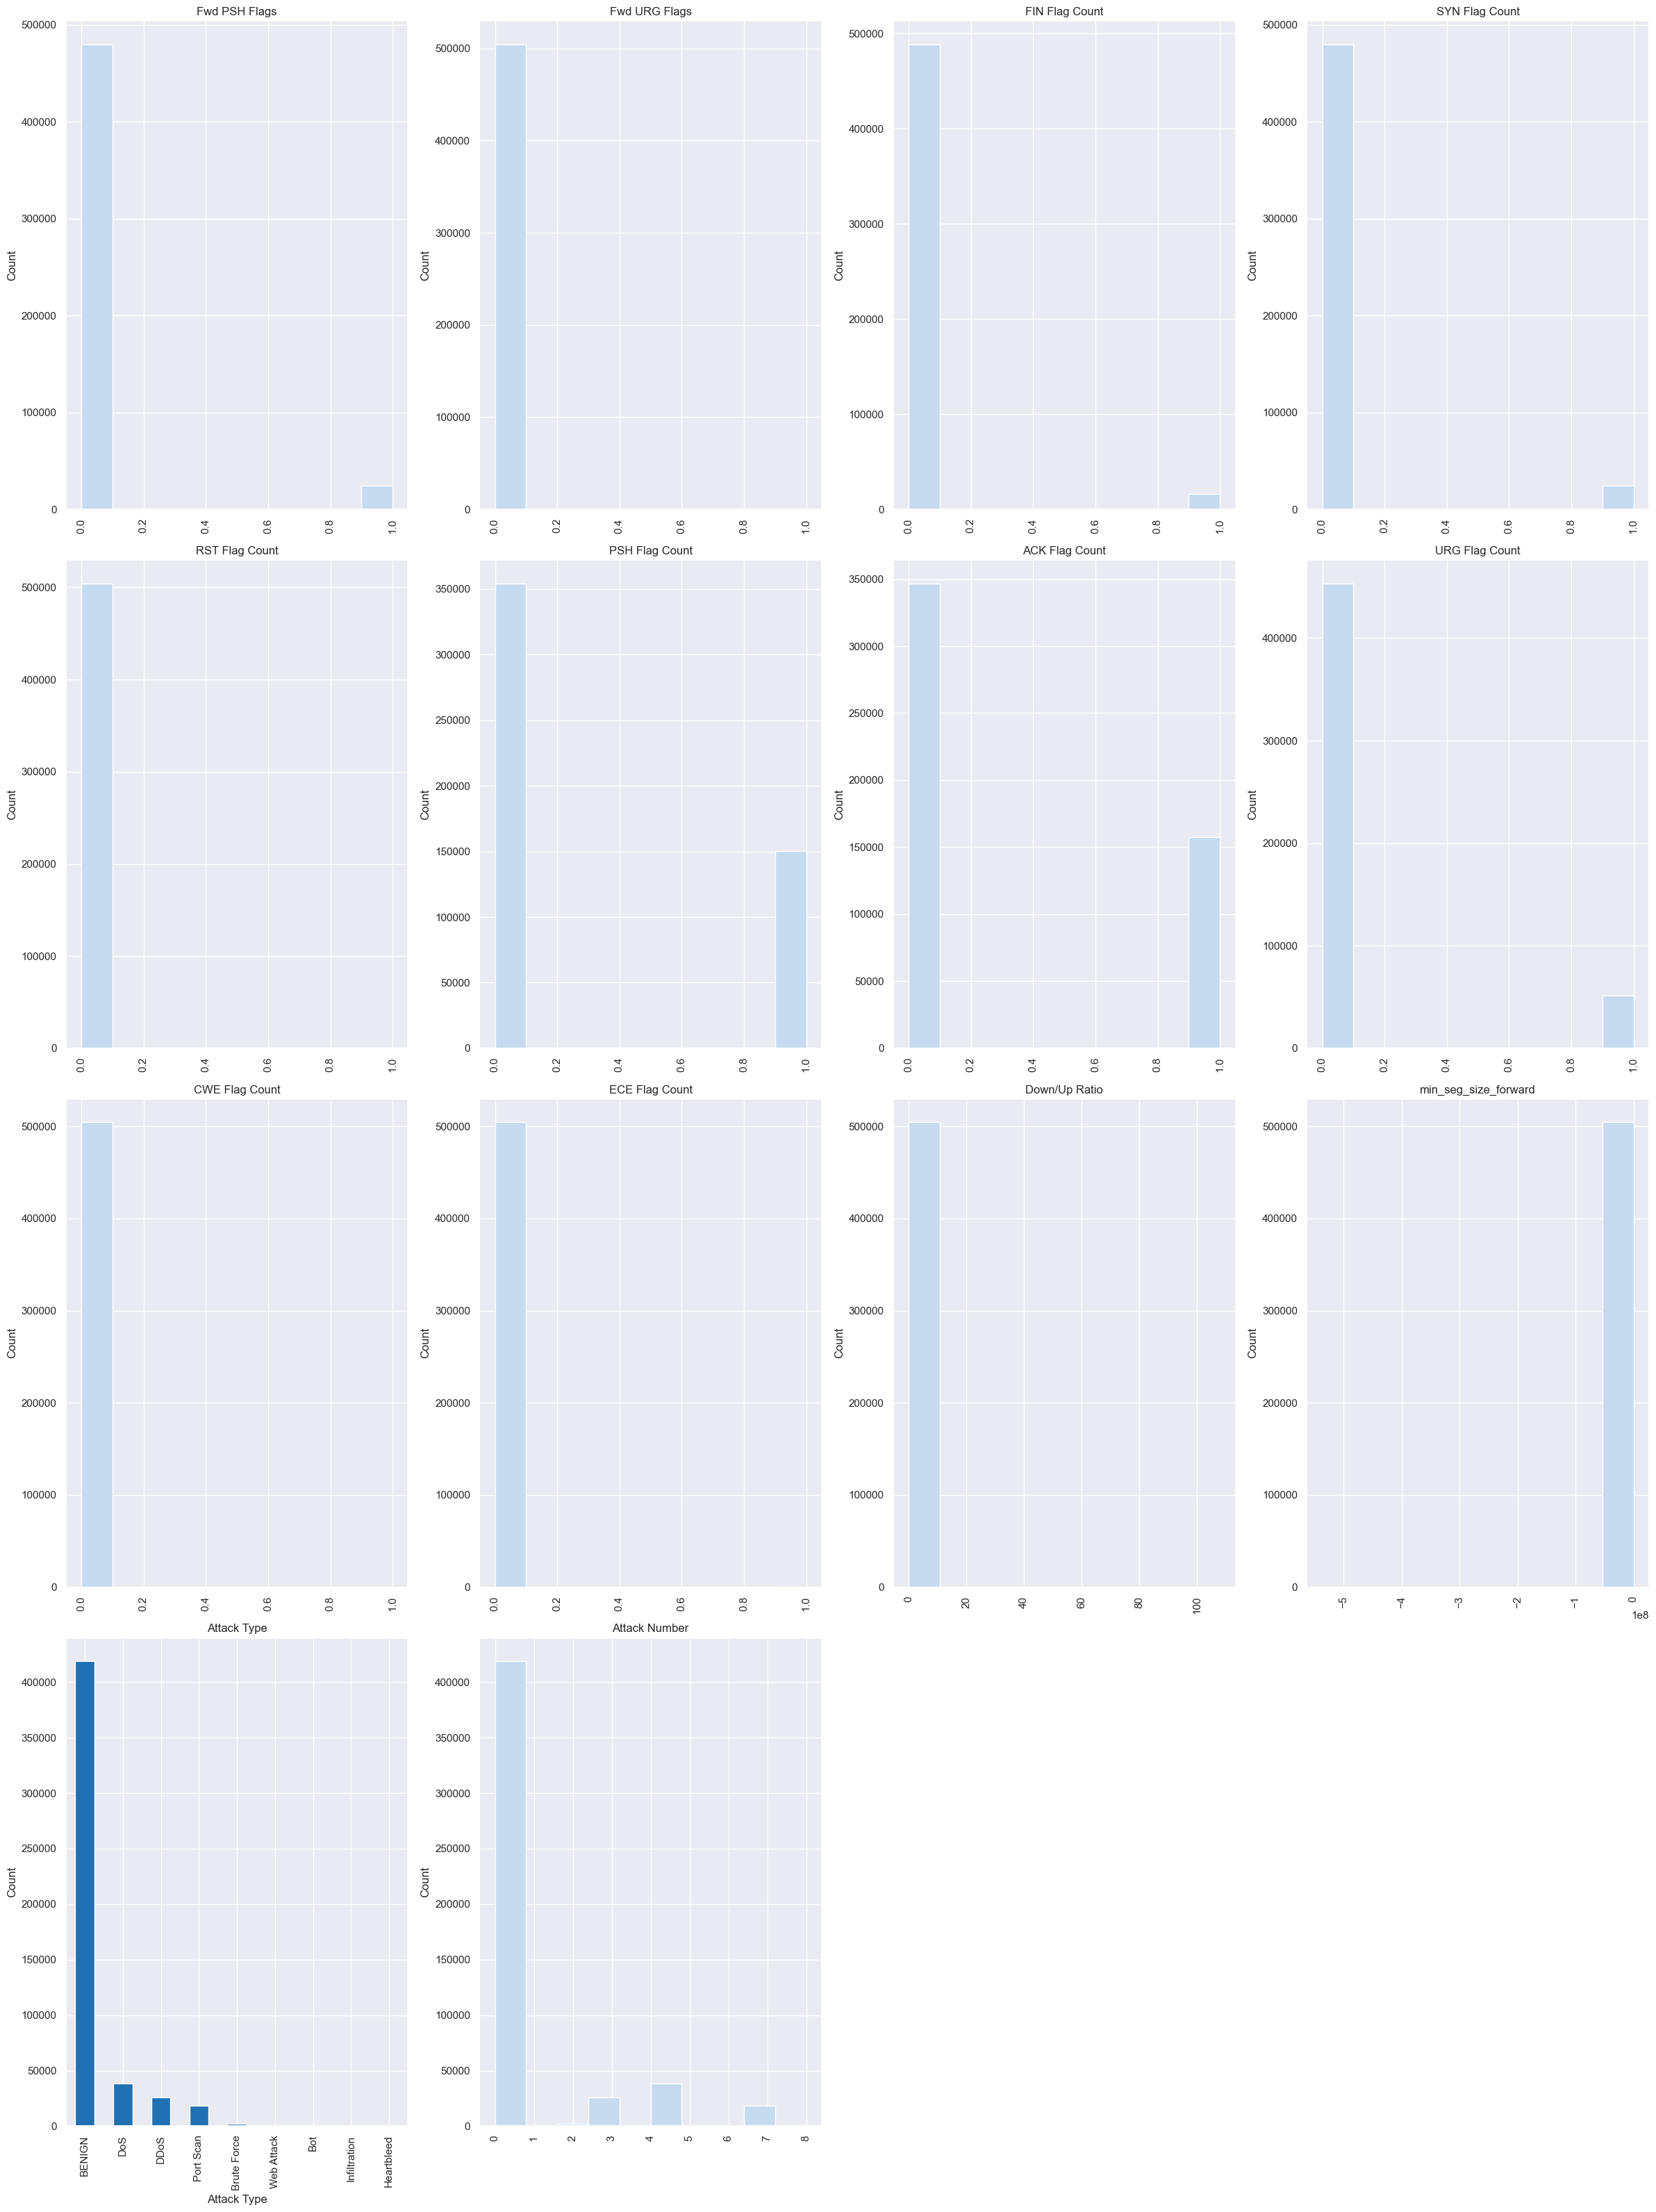

In [69]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [70]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
Destination Port,1.00,-0.17,-0.00,-0.00,0.02,-0.00,0.09,-0.05,0.14,0.12,-0.21,-0.26,-0.24,-0.19,0.07,0.36,-0.11,-0.13,-0.13,-0.02,-0.17,-0.11,-0.11,-0.13,-0.05,-0.12,-0.07,-0.04,-0.06,-0.05,0.23,nan,0.01,nan,0.00,0.00,0.35,0.15,-0.26,-0.14,-0.17,-0.14,-0.08,-0.04,0.23,-0.01,-0.22,0.58,0.52,0.01,-0.01,0.03,-0.17,0.14,-0.24,0.00,nan,nan,nan,nan,nan,nan,-0.00,0.02,-0.00,-0.00,-0.13,0.21,-0.00,0.00,-0.04,-0.05,-0.06,-0.03,-0.13,0.01,-0.12,-0.13,-0.12
Flow Duration,-0.17,1.00,0.02,0.02,0.10,0.02,0.27,-0.12,0.14,0.23,0.49,-0.24,0.45,0.43,-0.02,-0.11,0.54,0.74,0.78,0.06,1.00,0.54,0.72,0.78,0.21,0.82,0.41,0.52,0.58,0.21,-0.02,nan,-0.00,nan,-0.00,0.00,-0.10,-0.08,-0.25,0.50,0.42,0.45,0.27,0.22,-0.02,0.01,0.18,0.04,-0.12,-0.00,0.01,-0.17,0.40,0.14,0.45,-0.00,nan,nan,nan,nan,nan,nan,0.02,0.10,0.02,0.02,0.09,-0.03,0.02,-0.00,0.19,0.25,0.29,0.12,0.76,0.24,0.78,0.73,0.21
Total Fwd Packets,-0.00,0.02,1.00,1.00,0.69,0.99,0.01,-0.00,-0.00,0.00,0.03,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.02,-0.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.69,1.00,0.99,0.00,-0.00,0.87,-0.00,0.12,0.01,0.08,0.13,0.00,0.00,0.00,0.00,-0.00
Total Backward Packets,-0.00,0.02,1.00,1.00,0.68,0.99,0.01,-0.00,-0.00,0.00,0.03,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.02,-0.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.00,0.00,-0.00,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.03,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.68,1.00,0.99,0.00,-0.00,0.86,0.00,0.12,0.01,0.08,0.13,0.00,0.00,0.00,0.00,-0.00
Total Length of Fwd Packets,0.02,0.10,0.69,0.68,1.00,0.69,0.31,-0.00,0.29,0.25,0.04,-0.05,0.03,0.01,0.00,-0.02,0.01,0.02,0.04,-0.00,0.10,0.01,0.04,0.04,-0.01,0.12,0.01,0.06,0.07,-0.01,0.01,nan,-0.00,nan,-0.00,0.01,-0.02,-0.02,-0.05,0.12,0.13,0.09,0.06,-0.01,0.01,0.01,0.07,-0.01,-0.01,-0.00,0.01,-0.02,0.12,0.29,0.03,-0.00,nan,nan,nan,nan,nan,nan,0.69,1.00,0.68,0.69,0.05,0.01,0.78,-0.00,0.19,0.12,0.19,0.16,0.03,0.04,0.04,0.03,-0.03
Total Length of Bwd Packets,-0.00,0.02,0.99,0.99,0.69,1.00,0.01,-0.00,-0.00,-0.00,0.03,-0.00,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,-0.00,nan,0.00,0.02,-0.00,-0.00,-0.01,0.03,0.03,0.01,0.01,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,0.99,0.69,0.99,1.00,0.00,-0.00,0.88,0.00,0.11,0.00,0.07,0.13,0.00,-0.00,0.00,0.00,-0.00
Fwd Packet Length Max,0.09,0.27,0.01,0.01,0.31,0.01,1.00,-0.01,0.

In [71]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [72]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109246               21.66
Flow Duration                        93195               18.47
Total Fwd Packets                    50245                9.96
Total Backward Packets               47509                9.42
Total Length of Fwd Packets          62790               12.45
Total Length of Bwd Packets         114959               22.79
Fwd Packet Length Max                49348                9.78
Fwd Packet Length Min                 2490                0.49
Fwd Packet Length Mean               35398                7.02
Fwd Packet Length Std                47567                9.43
Bwd Packet Length Max                74464               14.76
Bwd Packet Length Min                13428                2.66
Bwd Packet Length Mean               87290               17.30
Bwd Packet Length Std                91318               18.10
Flow Bytes/s                         94952             

In [73]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 93525 (22.33%)
- DoS: 0 (0.00%)
- DDoS: 2 (0.01%)
- Port Scan: 2305 (12.51%)
- Brute Force: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Bot: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97175 (23.20%)
- DoS: 8444 (21.87%)
- DDoS: 4397 (16.96%)
- Port Scan: 403 (2.19%)
- Brute Force: 443 (23.86%)
- Web Attack: 67 (15.62%)
- Bot: 0 (0.00%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 77615 (18.53%)
- DoS: 464 (1.20%)
- DDoS: 833 (3.21%)
- Port Scan: 272 (1.48%)
- Brute Force: 0 (0.00%)
- Web Attack: 68 (15.85%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Backward Packets
- BENIGN: 59799 (14.28%)
- DoS: 4479 (11.60%)
- DDoS: 0 (0.00%)
- Port Scan: 97 (0.53%)
- Brute Force: 0 (0.00%)
- Web Attack: 36 (8.39%)
- Bot: 7 (1.82%)
- Infiltration: 1 (25.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 80997 (19

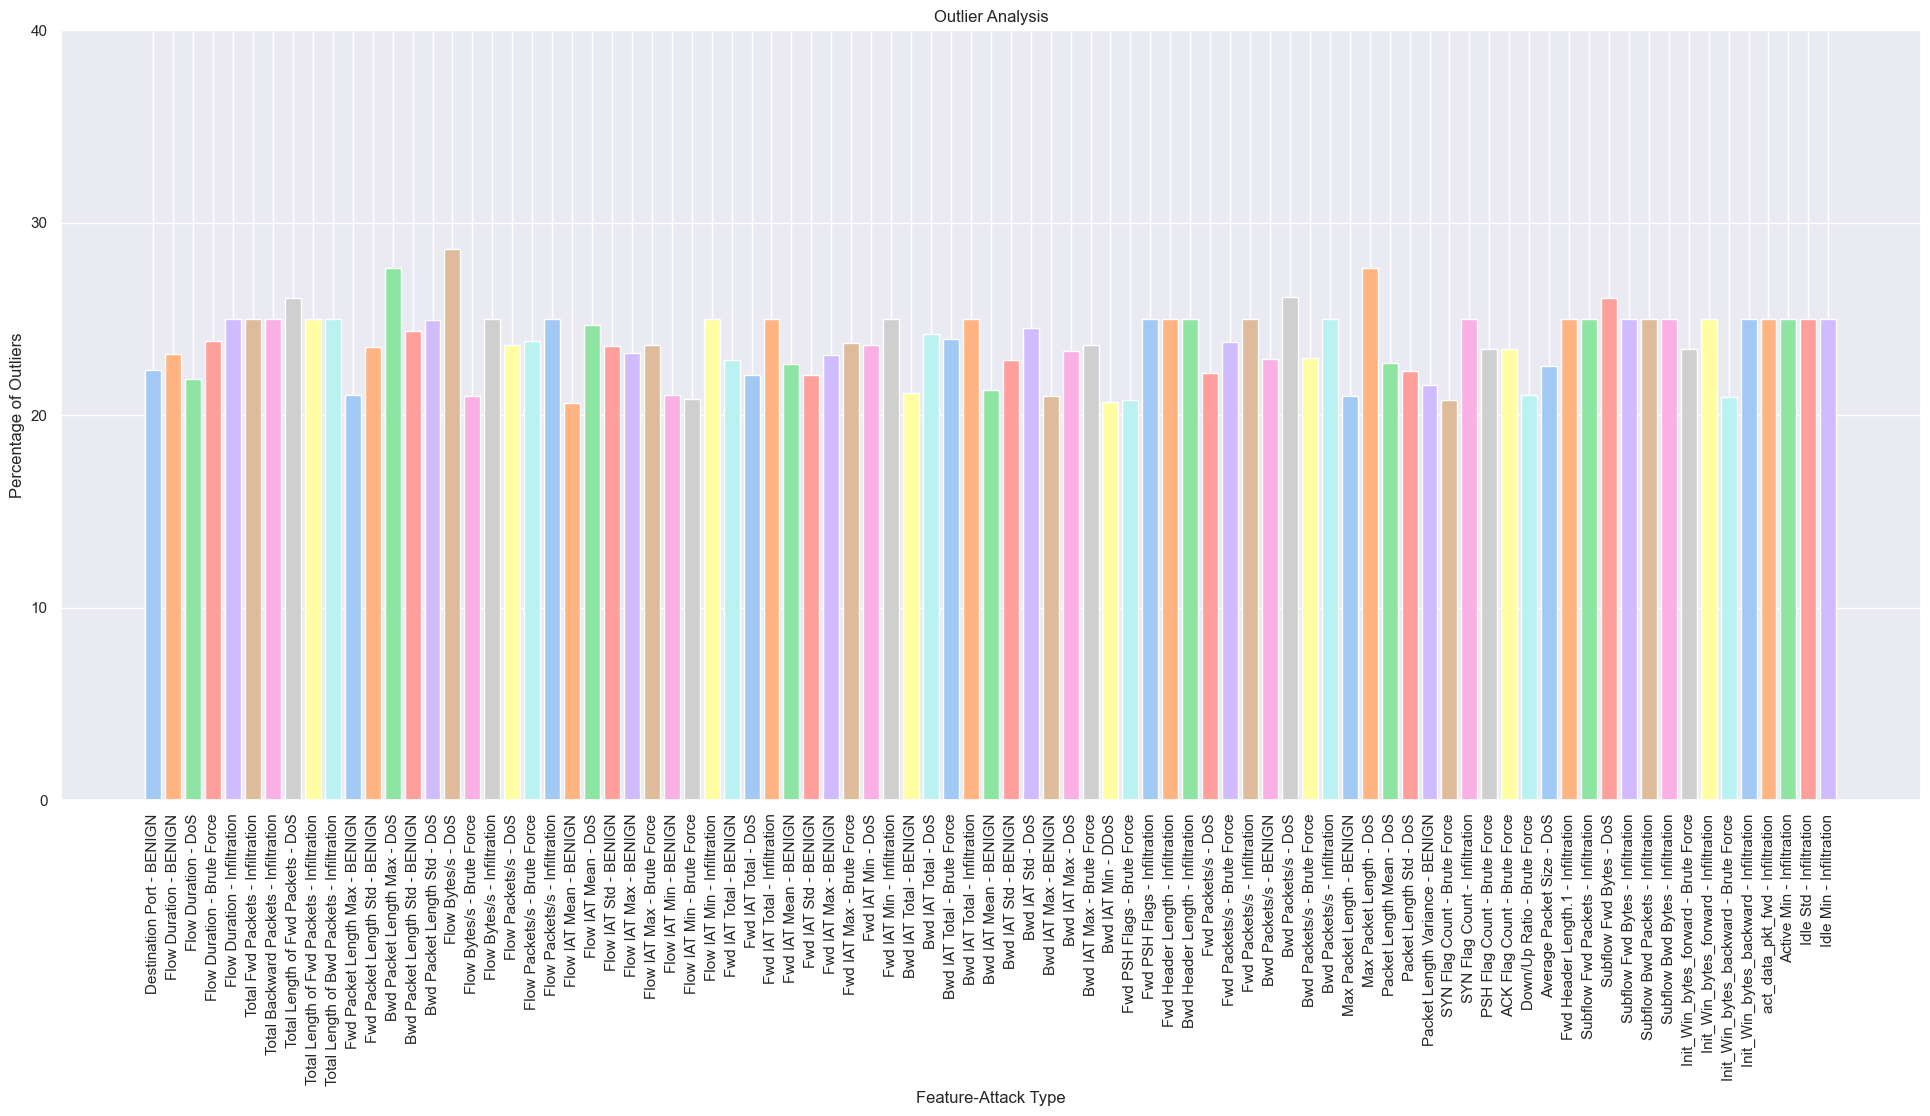

In [74]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

#### Categorical Variables

All the features in our dataset is numerical. We have one Categorical Variable.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\323780027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


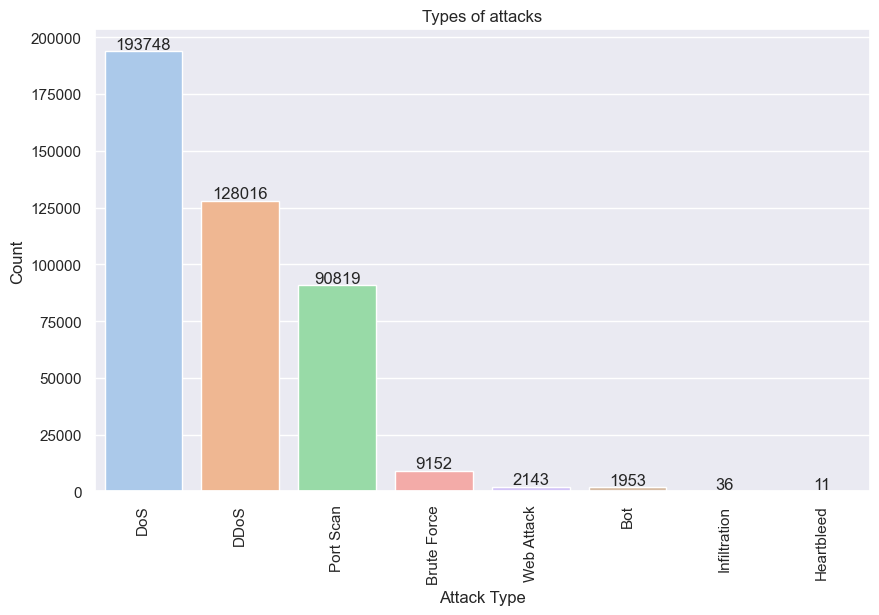

In [ ]:
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

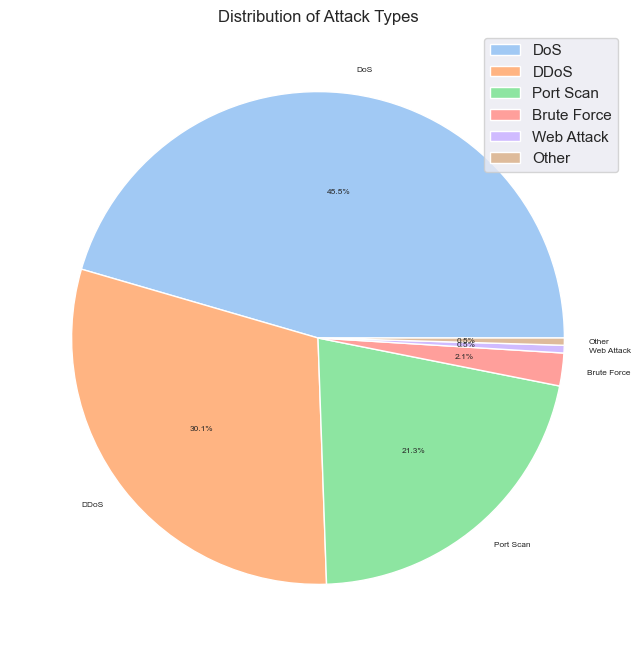

In [76]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [77]:
data.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.000000e+06,500000.000000,4.000000e+00,0.000000e+00,4,4,4,4.000000e+00,0.000000e+00,4,4,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882,124,5216127,2.608064e+06,3.686598e+06,5214882,1245,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,3525,0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173,112,218783,3.125471e+04,3.068629e+04,78311,219,5169833,1.033967e+06,2.218975e+06,5002421,840,0,0,0,0,172,132,1.547402,1.160551,0,3525,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984,0,119000000,4.444951e+04,2.224617e+05,5025702,0,119000000,6.904091e+04,2.738674e+05,5024984,1,0,0,0,0,85928,55336,22.505772,14.492544,0,17376,1713.525708,2669.389319,7.125639e+06,0,0,0,1,0,0,0,0,0,1713.913910,3.090875,4370.686524,85928,0,0,0,0,0,0,2685,8299,1729,7556917,29200,235,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000

## Data Preprocessing

### Preprocessing

In [ ]:
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1539.53 MB
Final memory usage: 808.25 MB


In [79]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 47.50%


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2522362 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int32  
 1   Flow Duration                int32  
 2   Total Fwd Packets            int32  
 3   Total Backward Packets       int32  
 4   Total Length of Fwd Packets  int32  
 5   Total Length of Bwd Packets  int32  
 6   Fwd Packet Length Max        int32  
 7   Fwd Packet Length Min        int32  
 8   Fwd Packet Length Mean       float32
 9   Fwd Packet Length Std        float32
 10  Bwd Packet Length Max        int32  
 11  Bwd Packet Length Min        int32  
 12  Bwd Packet Length Mean       float32
 13  Bwd Packet Length Std        float32
 14  Flow Bytes/s                 float32
 15  Flow Packets/s               float32
 16  Flow IAT Mean                float32
 17  Flow IAT Std                 float32
 18  Flow IAT Max                 int32  
 19  Flow I

In [81]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-1.300000e+01,208.000000,50577.000000,5.329717e+06,1.200000e+08
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Total Length of Bwd Packets,2522362.0,1.813315e+04,2.397434e+06,0.000000e+00,6.000000,155.000000,9.880000e+02,6.554530e+08
Fwd Packet Length Max,2522362.0,2.310918e+02,7.561625e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd Packet Length Min,2522362.0,1.919464e+01,6.079447e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2522362.0,6.347013e+01,1.955015e+02,0.000000e+00,6.000000,36.111111,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2522362.0,7.727757e+01,2.967953e+02,0.000000e+00,0.000000,0.000000,7.413914e+01,7.125597e+03


In [82]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [83]:
data.shape

(2522362, 71)

In [84]:
# Columns after removing non variant columns
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

### Applying PCA to reduce dimensions


In [85]:
features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [86]:
size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.30%


In [87]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [88]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.357605,-0.054980,0.577367,0.734454,3.730371,0.234648,-0.015694,-0.215593,-0.278501,1.087262,0.032711,0.067621,1.638439,0.371324,-0.794797,0.003730,0.069457,0.614933,-0.658005,-0.596658,-0.350690,-0.714309,-1.721585,-0.069528,-0.420207,0.904754,-0.147988,-0.334371,1.487918,-0.163631,-0.219312,-0.004576,0.002609,0.034128,-0.015853,BENIGN
1,-2.883854,-0.069938,0.911321,1.763147,8.846136,0.620454,-0.056858,1.106466,1.906559,-2.756474,-0.950592,-0.843113,6.052571,1.568504,-4.731659,-0.120694,1.313557,1.949344,-0.497494,-0.591938,-0.199933,-0.566894,-5.606576,0.296477,1.603394,0.594120,0.282642,-2.347082,2.238826,-0.640825,-0.367420,0.010520,0.000645,0.125795,-0.190767,BENIGN
2,-2.416928,-0.056683,0.615335,0.850869,4.304213,0.275779,-0.020438,-0.070542,-0.035290,0.664153,-0.076172,-0.033045,2.132309,0.504258,-1.230418,-0.009935,0.206592,0.763981,-0.642472,-0.598090,-0.334834,-0.697290,-2.155998,-0.032073,-0.196749,0.868293,-0.101730,-0.545536,1.572158,-0.213910,-0.234609,-0.003047,0.002402,0.043993,-0.035273,BENIGN
3,-2.884705,-0.069978,0.912183,1.765263,8.851561,0.618717,-0.057028,1.104621,1.906986,-2.752501,-0.950219,-0.842586,6.055982,1.568418,-4.729850,-0.120534,1.312459,1.950124,-0.499796,-0.593895,-0.200827,-0.566254,-5.609324,0.293264,1.602008,0.592174,0.281052,-2.334612,2.239632,-0.638082,-0.366261,0.010372,0.000655,0.125475,-0.190752,BENIGN
4,-1.505248,0.080886,-0.504396,0.290414,-0.539267,0.746103,0.100443,0.732508,-1.145775,-0.563206,-0.043730,-0.207928,-0.433553,0.033402,-0.609130,0.018303,-0.249173,-0.475477,-0.140381,0.113623,-0.114053,0.096071,0.291834,0.385968,-0.255655,-0.689650,-0.599155,0.116353,0.795041,-0.211000,0.042492,-0.014254,0.000957,-0.052009,0.001372,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-2.270966,-0.048462,0.480012,0.461159,2.163937,-0.144601,-0.016015,-0.777804,-0.908055,2.711084,0.413813,0.405736,0.990244,-0.084219,0.911051,0.011116,-0.030085,0.339254,-0.328302,-0.307958,-0.436224,-1.017082,-0.319116,-0.280794,-0.369498,0.762724,-0.043101,0.787857,0.785667,0.247959,0.036167,-0.017415,0.001898,0.005532,-0.005967,BENIGN
2522358,-2.267921,-0.048377,0.478583,0.457923,2.144121,-0.146620,-0.015946,-0.780613,-0.911196,2.717732,0.416385,0.408586,0.957450,-0.091206,0.928823,0.012636,-0.044514,0.326976,-0.347688,-0.340585,-0.425384,-1.035495,-0.346322,-0.274981,-0.359969,0.758203,-0.041162,0.789232,0.787023,0.249306,0.038001,-0.017559,0.001901,0.005085,-0.006293,BENIGN
2522359,-2.267236,-0.048358,0.478260,0.457172,2.139660,-0.147061,-0.015930,-0.781230,-0.911881,2.719162,0.416950,0.409214,0.950138,-0.092751,0.932744,0.012972,-0.047707,0.324249,-0.351975,-0.347804,-0.422976,-1.039582,-0.352317,-0.273678,-0.357846,0.757177,-0.040728,0.789376,0.787329,0.249559,0.038386,-0.017590,0.001901,0.004988,-0.006363,BENIGN
2522360,-2.102459,-0.041899,0.361540,0.268739,1.795816,0.284755,0.006681,-0.296210,-0.631077,0.966695,0.082003,0.111121,-0.168879,0.134400,-0.233594,0.075831,-0.641996,-0.128213,-0.838009,-0.492747,-0.516140,-0.084907,-0.588280,0.123071,-0.998522,0.312900,-0.372704,1.793470,-0.925189,0.297419,0.128586,-0.006211,0.002178,-0.077697,0.032569,BENIGN


## 4.	Machine Learning Models

### Creating a Balanced Dataset for Binary Classification

In [89]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    7566
1    7434
Name: count, dtype: int64


In [90]:
# Splitting the data into features (X) and target (y)
X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

### Logistic Regression (Binary Classification)

In [91]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():.2f}')

Logistic regression Model 1

Cross-validation scores: 0.9217777777777778, 0.9284444444444444, 0.9271111111111111, 0.9257777777777778, 0.9191111111111111

Mean cross-validation score: 0.92


In [92]:
print('Logistic Regression Model 1 coefficients:')
print(*lr1.coef_, sep = ', ')
print('\nLogistic Regression Model 1 intercept:', *lr1.intercept_)

Logistic Regression Model 1 coefficients:
[ 0.44862185 -0.32844521 -0.4395024  -1.81208153  0.73906472  1.02272452
  0.04384194  0.33337451 -0.39083419  0.32266206  0.03919842 -0.01760829
 -0.19398801  0.61371387  0.57364369 -0.02372798  0.13493805 -0.77817166
 -0.07682877  0.69366276 -0.43015478 -0.77832478  0.6644893   2.25840503
 -0.89050272 -1.99638976 -1.80545557 -0.56983008 -0.67003824  1.83145826
  0.33061887 -0.03964884  0.02101472  1.29275772 -1.35916462]

Logistic Regression Model 1 intercept: -3.0792003373139165


In [93]:
lr2 = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr2.fit(X_train_bc, y_train_bc)

cv_lr2 = cross_val_score(lr2, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr2)))
print(f'\nMean cross-validation score: {cv_lr2.mean():.2f}')

Logistic regression Model 2

Cross-validation scores: 0.9266666666666666, 0.9311111111111111, 0.9315555555555556, 0.9293333333333333, 0.9226666666666666

Mean cross-validation score: 0.93


In [94]:
print('Logistic Regression Model 2 coefficients:')
print(*lr2.coef_, sep = ', ')
print('\nLogistic Regression Model 2 intercept:', *lr2.intercept_)

Logistic Regression Model 2 coefficients:
[ 5.03178768e-01 -7.50794324e+00 -1.35017011e+00 -1.14921252e+00
  8.72233712e-01  1.74081147e+00  8.42400925e-02  6.70680344e-01
 -4.31324333e-01  9.84180559e-01  3.82676693e-01 -8.11512649e-01
 -4.65096996e-01  4.06637035e+00  1.52679593e+00 -4.63601848e-02
  2.37555105e-01 -1.64309072e+00 -7.08178521e-03  1.33396535e+00
 -6.14286408e-01 -1.11962572e+00  2.89548099e-01  3.26036609e+00
 -1.49222226e+00 -3.03696787e+00 -2.77848023e+00 -1.16071864e+00
 -9.57648092e-01  3.98691126e+00 -5.97949431e-01  2.25582498e-01
  3.89258473e-02  2.07177696e+00 -2.16773522e+00]

Logistic Regression Model 2 intercept: -4.820191997005292


### Support Vector Machine (Binary Classification)

In [95]:
svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

Support Vector Machine Model 1

Cross-validation scores: 0.9, 0.908, 0.8986666666666666, 0.8995555555555556, 0.9075555555555556

Mean cross-validation score: 0.90


In [96]:
svm2 = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm2.fit(X_train_bc, y_train_bc)

cv_svm2 = cross_val_score(svm2, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm2)))
print(f'\nMean cross-validation score: {cv_svm2.mean():.2f}')

Support Vector Machine Model 2

Cross-validation scores: 0.9577777777777777, 0.9604444444444444, 0.9644444444444444, 0.9675555555555555, 0.9595555555555556

Mean cross-validation score: 0.96


In [97]:
print('SVM Model 1 intercept:', *svm1.intercept_)
print('SVM Model 2 intercept:', *svm2.intercept_)

SVM Model 1 intercept: -0.6227525908948123
SVM Model 2 intercept: -0.3934608795588984


### Creating a Balanced Dataset for Multi-class Classification

In [98]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [99]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

In [100]:
!pip install -U imbalanced-learn


In [101]:

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

Attack Type
DoS            5000
Brute Force    5000
Port Scan      5000
Web Attack     5000
Bot            5000
BENIGN         5000
DDoS           5000
Name: count, dtype: int64

In [102]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

### Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():.2f}')

Random Forest Model 1

Cross-validation scores: 0.9516190476190476, 0.9506666666666667, 0.9546666666666667, 0.9643809523809523, 0.9514285714285714

Mean cross-validation score: 0.95


In [104]:
from sklearn.metrics import accuracy_score

y_train_pred = rf1.predict(X_train)
y_test_pred  = rf1.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:  {test_acc:.3f}")
print(f"Difference:     {abs(train_acc - test_acc):.3f}")


Train Accuracy: 0.957
Test Accuracy:  0.955
Difference:     0.002


In [ ]:
joblib.dump(rf1, r"C:\Users\Lenovo\Desktop\Datasets_Log\rf_model.pkl")
print(" Model uğurla saxlanıldı!")

✅ Model uğurla saxlanıldı!


In [106]:
rf2 = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf2.fit(X_train, y_train)

cv_rf2 = cross_val_score(rf2, X_train, y_train, cv = 5)
print('Random Forest Model 2')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf2)))
print(f'\nMean cross-validation score: {cv_rf2.mean():.2f}')

Random Forest Model 2

Cross-validation scores: 0.9820952380952381, 0.9828571428571429, 0.981904761904762, 0.9830476190476191, 0.9769523809523809

Mean cross-validation score: 0.98


Decision Tree Model 1

Cross-validation scores: 0.952, 0.9504761904761905, 0.9455238095238095, 0.956, 0.9500952380952381

Mean cross-validation score: 0.95


Decision Tree Model 2

Cross-validation scores: 0.9752380952380952, 0.9731428571428572, 0.9693333333333334, 0.9742857142857143, 0.9704761904761905

Mean cross-validation score: 0.97


### K Nearest Neighbours

K Nearest Neighbors Model 1

Cross-validation scores: 0.9706666666666667, 0.9748571428571429, 0.9761904761904762, 0.9758095238095238, 0.9695238095238096

Mean cross-validation score: 0.97


K Nearest Neighbors Model 1

Cross-validation scores: 0.9777142857142858, 0.9786666666666667, 0.9801904761904762, 0.9820952380952381, 0.9761904761904762

Mean cross-validation score: 0.98


## 5.	Performance Evaluation and Discussion

In [111]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, \
 roc_auc_score, roc_curve, auc, precision_recall_curve

### Logistic Regression Models Comparison

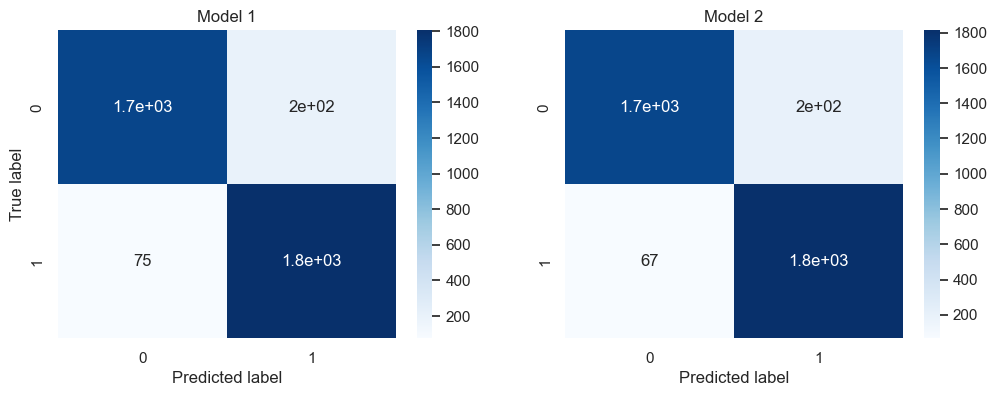

In [112]:
y_pred_lr1 = lr1.predict(X_test_bc)
y_pred_lr2 = lr2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_lr2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

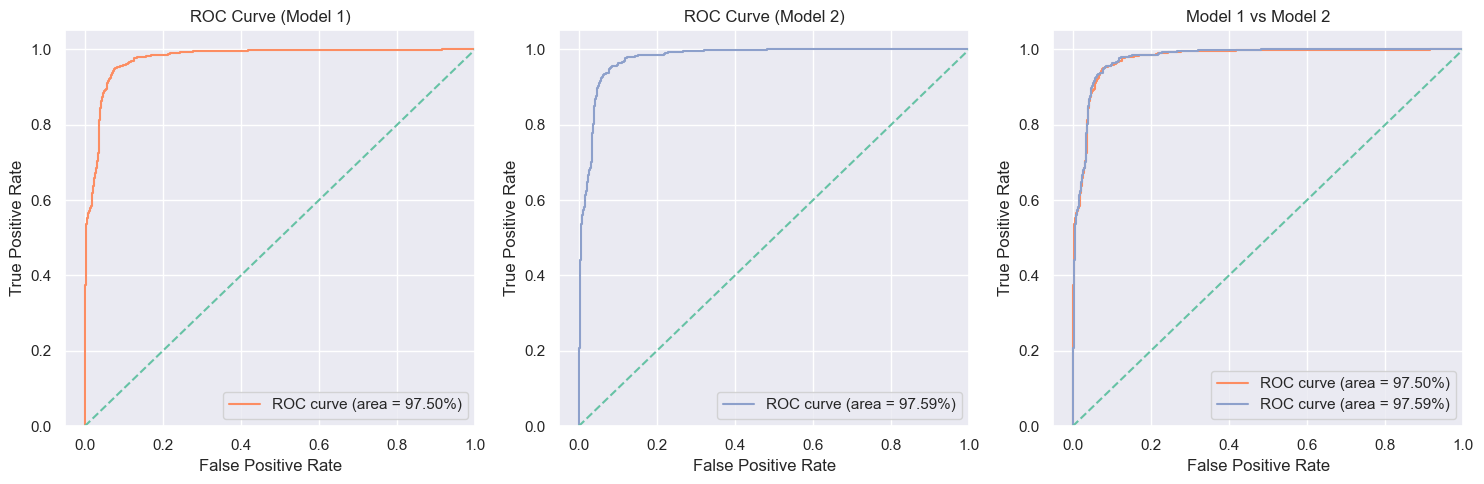

In [113]:
y_prob_lr1 = lr1.predict_proba(X_test_bc)[:,1]
y_prob_lr2 = lr2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc2 = auc(fpr2, tpr2)

colors = sns.color_palette('Set2', n_colors = 3)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

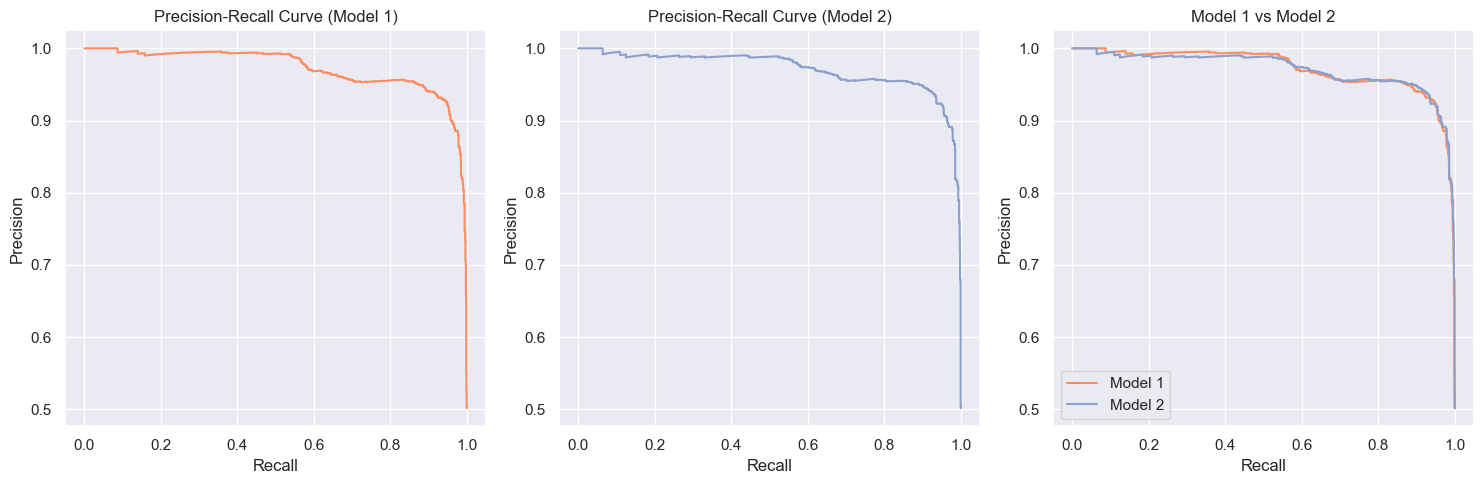

In [114]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_lr2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

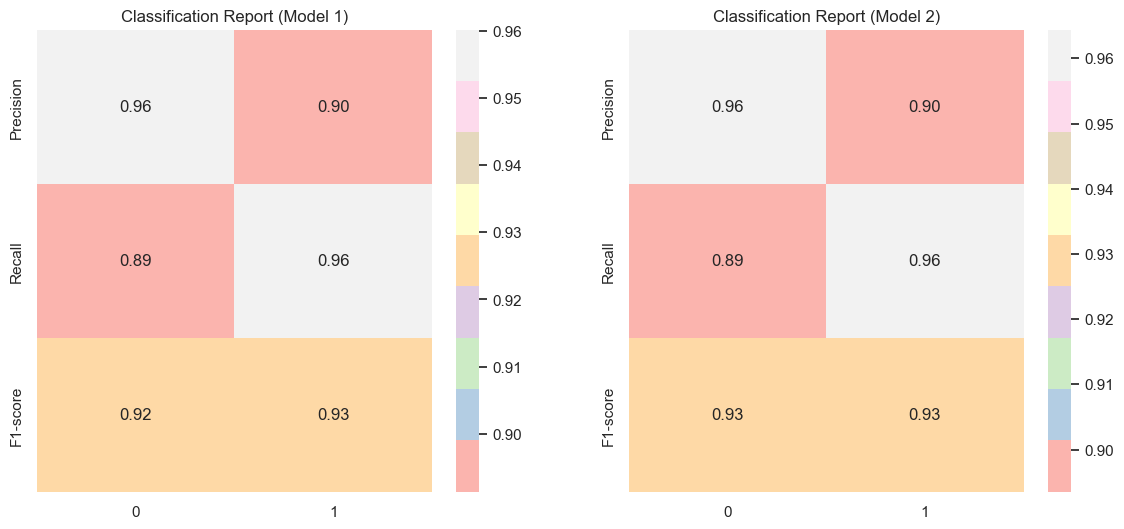

In [115]:
target_names = lr1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap='Pastel1', annot = True, fmt='.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

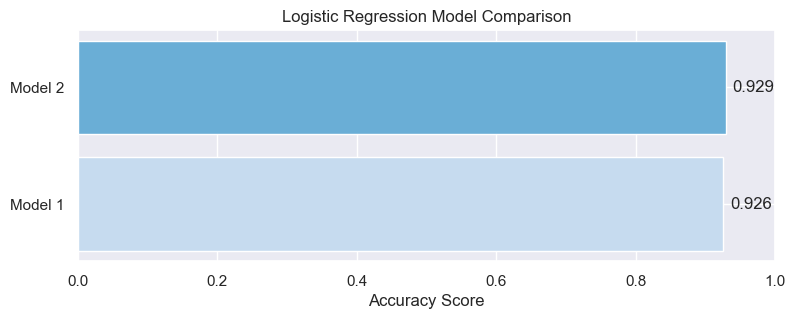

In [116]:
palette = sns.color_palette('Blues', n_colors = 3)

acc1 = accuracy_score(y_pred_lr1, y_test_bc)
acc2 = accuracy_score(y_pred_lr2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Logistic Regression Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

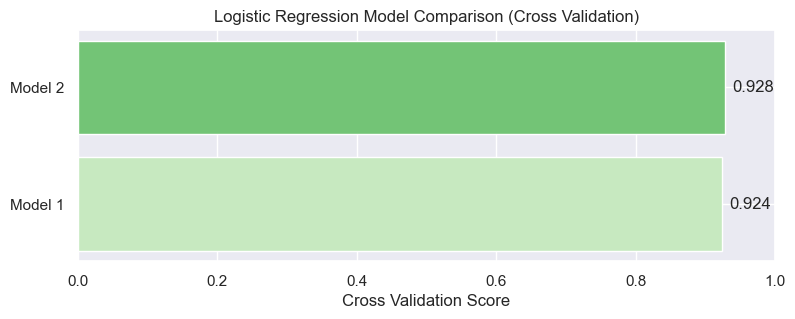

In [117]:
palette = sns.color_palette('Greens', n_colors = 3)

labels = ['Model 1', 'Model 2']
scores = [cv_lr1.mean(), cv_lr2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Logistic Regression Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Support Vector Machine Models Comparison

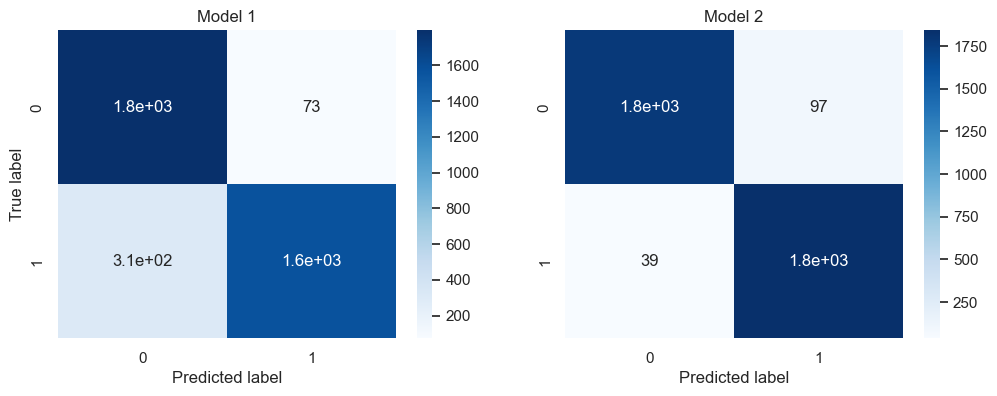

In [118]:
y_pred_svm1 = svm1.predict(X_test_bc)
y_pred_svm2 = svm2.predict(X_test_bc)

conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_svm1)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

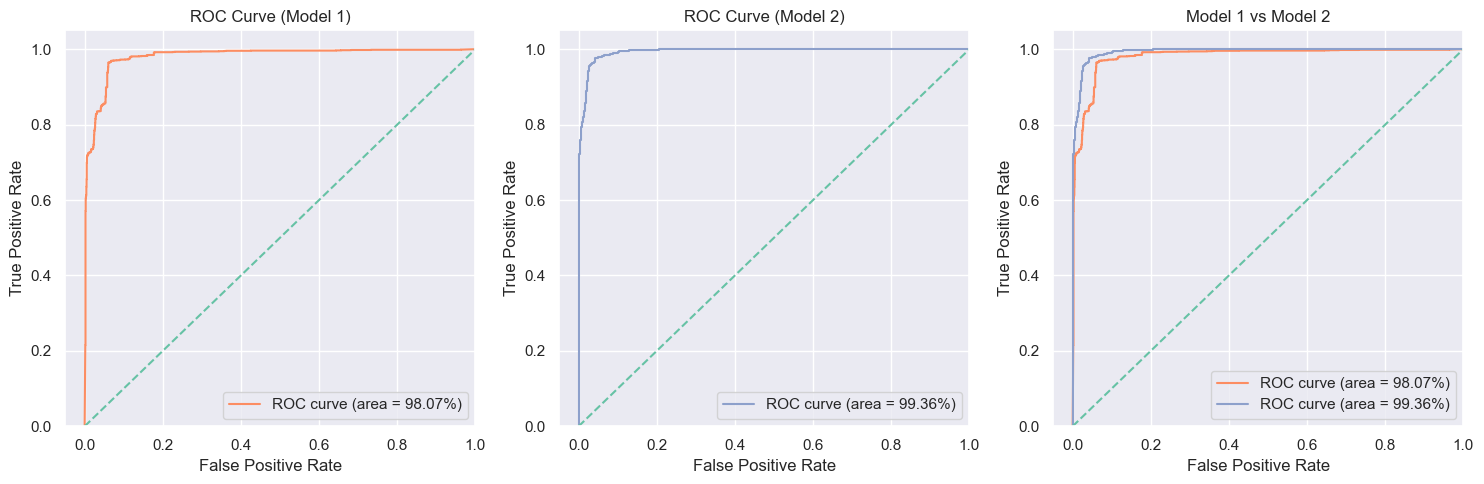

In [119]:
y_prob_svm1 = svm1.predict_proba(X_test_bc)[:,1]
y_prob_svm2 = svm2.predict_proba(X_test_bc)[:,1]

fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_svm1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Model 1)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (Model 2)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('Model 1 vs Model 2')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

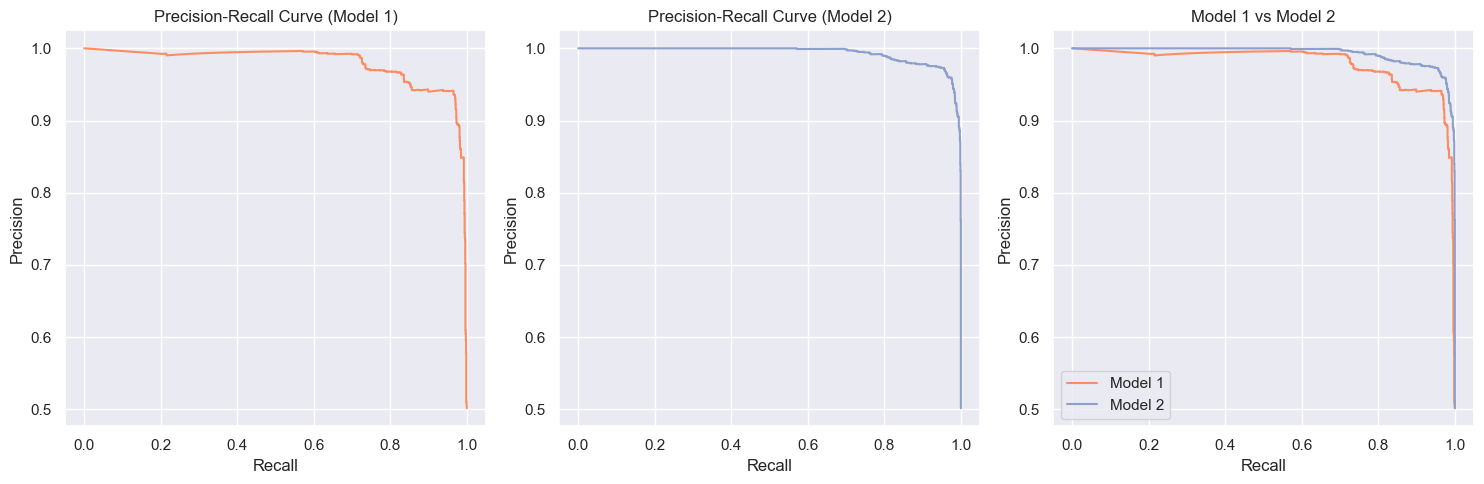

In [120]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_svm1)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1])
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (Model 1)')

axs[1].plot(recall2, precision2, color = colors[2])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (Model 2)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Model 1 vs Model 2')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

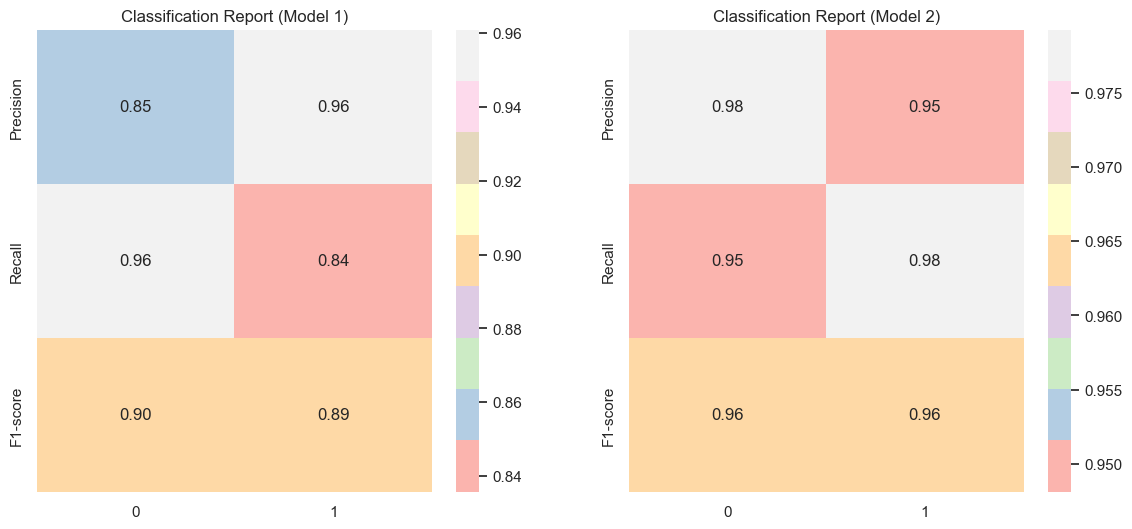

In [121]:
target_names = svm1.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
plt.show()

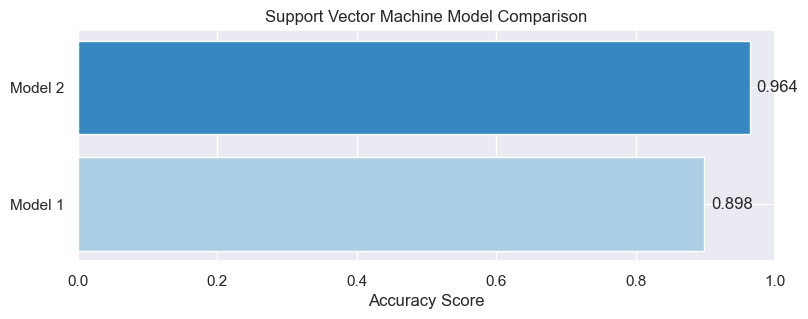

In [122]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_svm1, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Support Vector Machine Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

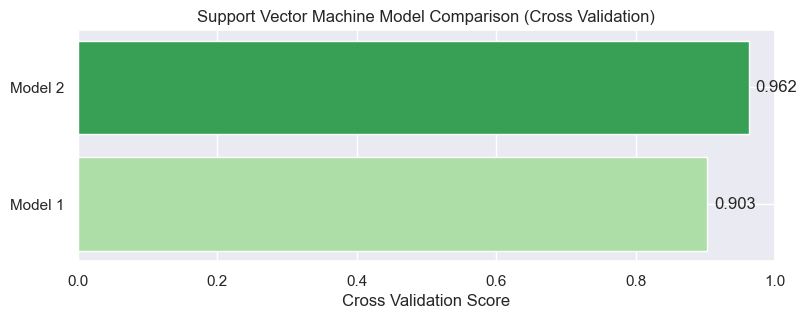

In [123]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Model 1', 'Model 2']
scores = [cv_svm1.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Support Vector Machine Model Comparison (Cross Validation)')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Comparison of the Binary Classification Algorithms

We trained two models for each different classification algorithm. For comparing different algorithms, we will take the best performing model from each class based on the model's precision, recall, accuracy, etc.

1. Logistic Regression: Model 2
1. Support Vector Machine: Model 2

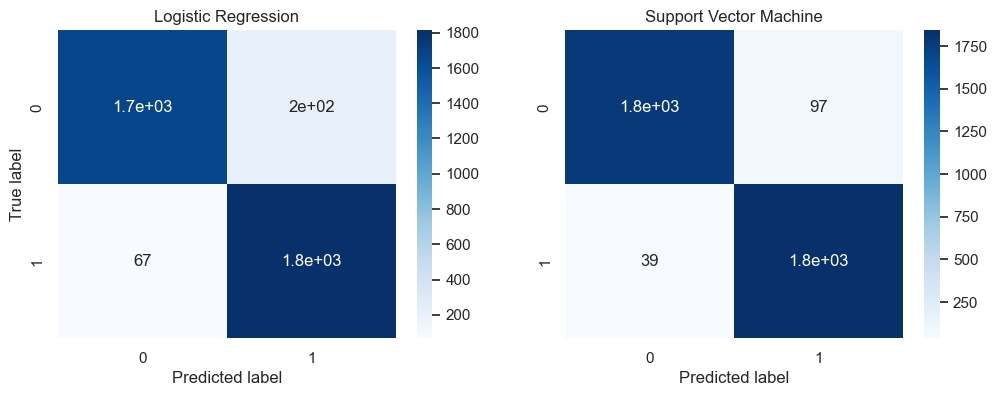

In [124]:
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr2)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm2)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Logistic Regression')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1])
axs[1].set_title('Support Vector Machine')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')
plt.show()

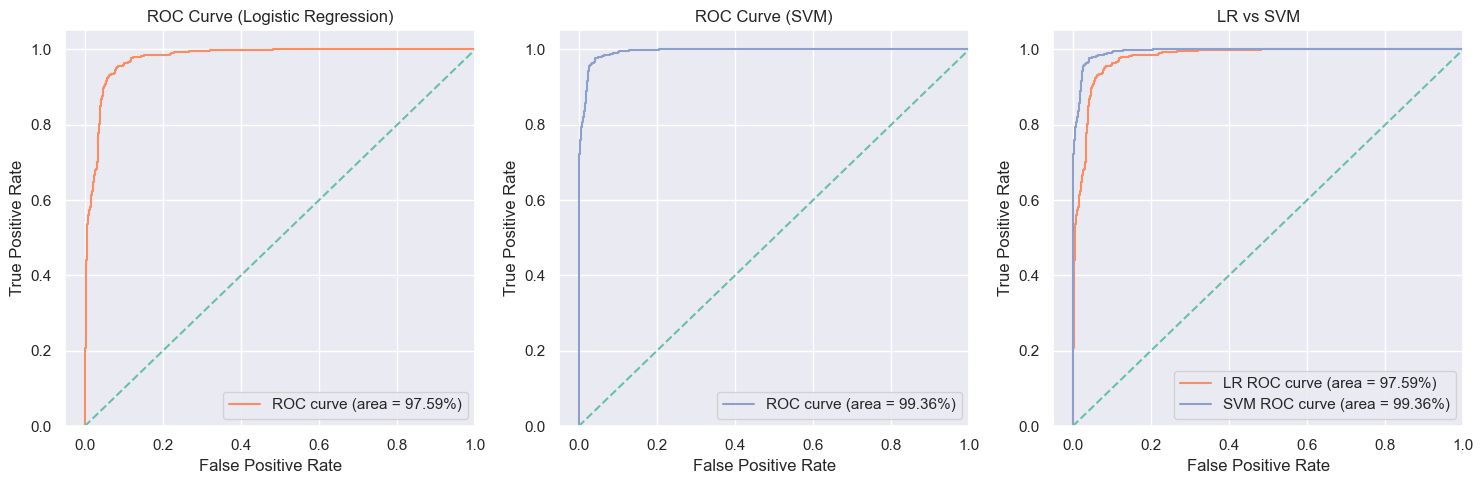

In [125]:
fpr1, tpr1, _ = roc_curve(y_test_bc, y_prob_lr2)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bc, y_prob_svm2)
roc_auc2 = auc(fpr2, tpr2)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))

axes[0].plot(fpr1, tpr1, label = f'ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[0].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[0].set_xlim([-0.05, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve (Logistic Regression)')
axes[0].legend(loc = 'lower right')

axes[1].plot(fpr2, tpr2, label = f'ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[1].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[1].set_xlim([-0.05, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve (SVM)')
axes[1].legend(loc = 'lower right')

axes[2].plot(fpr1, tpr1, label = f'LR ROC curve (area = {roc_auc1:.2%})', color = colors[1])
axes[2].plot(fpr2, tpr2, label = f'SVM ROC curve (area = {roc_auc2:.2%})', color = colors[2])
axes[2].plot([0, 1], [0, 1], color = colors[0], linestyle = '--')
axes[2].set_xlim([-0.05, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('LR vs SVM')
axes[2].legend(loc = 'lower right')

plt.tight_layout()
plt.show()

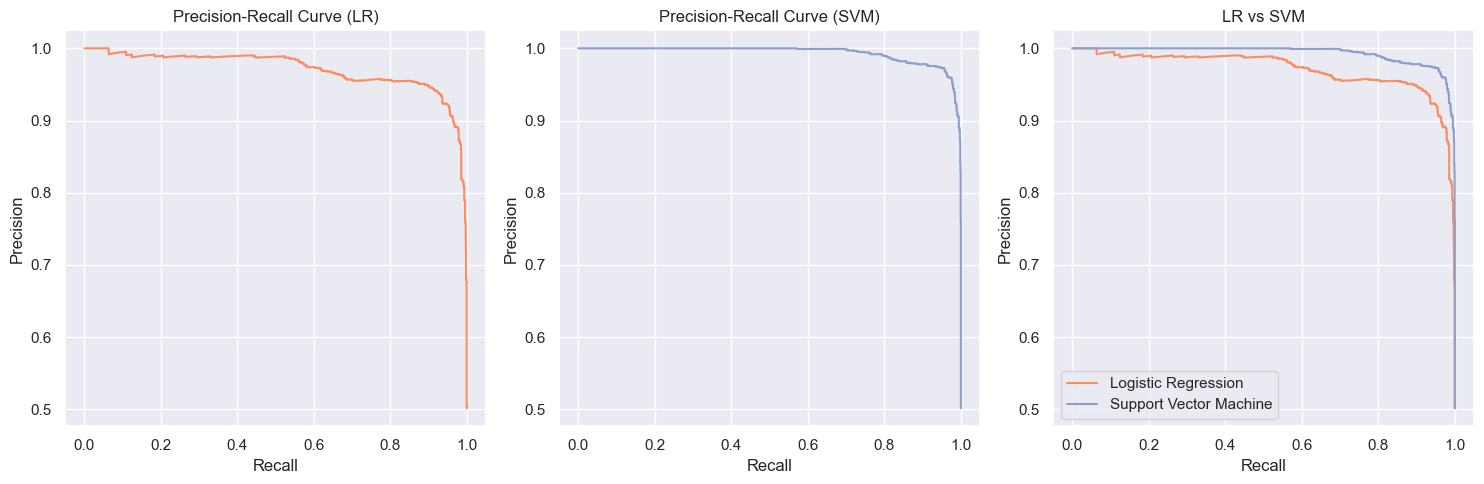

In [126]:
precision1, recall1, threshold1 = precision_recall_curve(y_test_bc, y_prob_lr2)
precision2, recall2, threshold2 = precision_recall_curve(y_test_bc, y_prob_svm2)

fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(recall1, precision1, color = colors[1], label = 'Model 1')
axs[0].set_xlabel('Recall')
axs[0].set_ylabel('Precision')
axs[0].set_title('Precision-Recall Curve (LR)')

axs[1].plot(recall2, precision2, color = colors[2], label = 'Model 2')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve (SVM)')

axs[2].plot(recall1, precision1, color = colors[1], label = 'Logistic Regression')
axs[2].plot(recall2, precision2, color = colors[2], label = 'Support Vector Machine')
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('LR vs SVM')
axs[2].legend(loc = 'lower left')

plt.tight_layout()
plt.show()

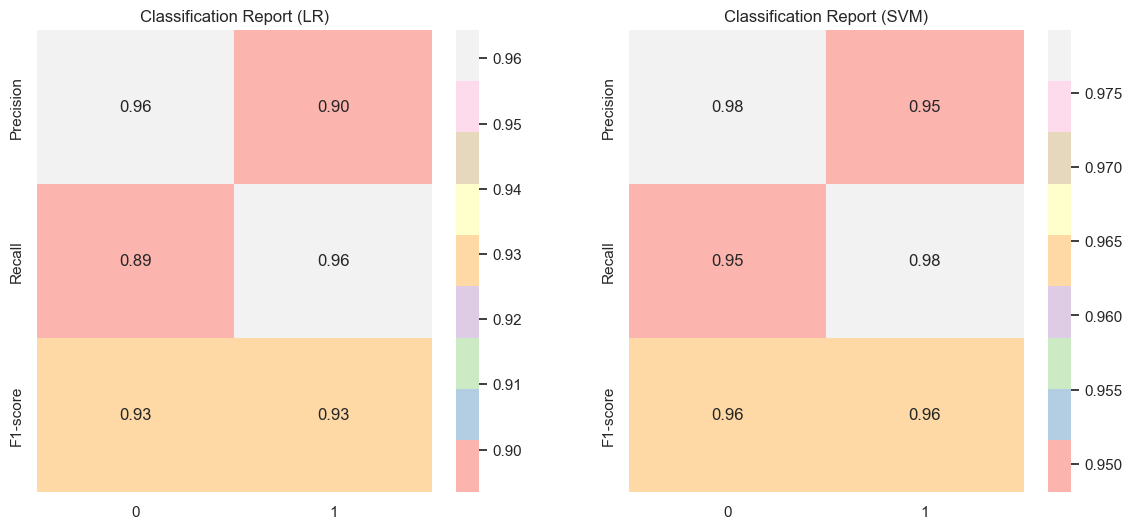

In [127]:
target_names = svm2.classes_
metrics1 = classification_report(y_true = y_test_bc, y_pred = y_pred_lr2, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test_bc, y_pred = y_pred_svm2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax=axs[1])
axs[0].set_title('Classification Report (LR)')
axs[1].set_title('Classification Report (SVM)')
plt.show()

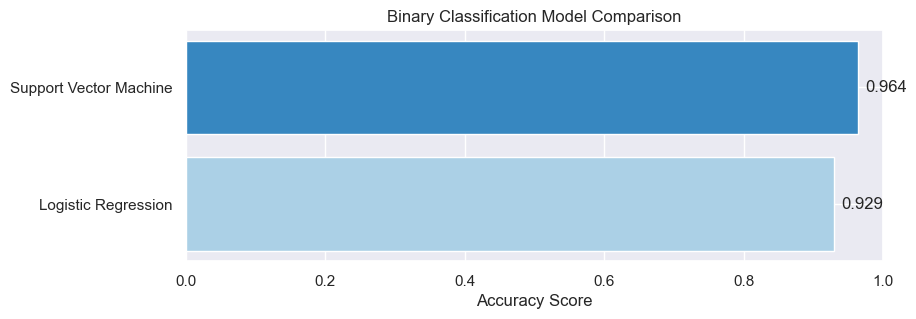

In [128]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_lr2, y_test_bc)
acc2 = accuracy_score(y_pred_svm2, y_test_bc)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

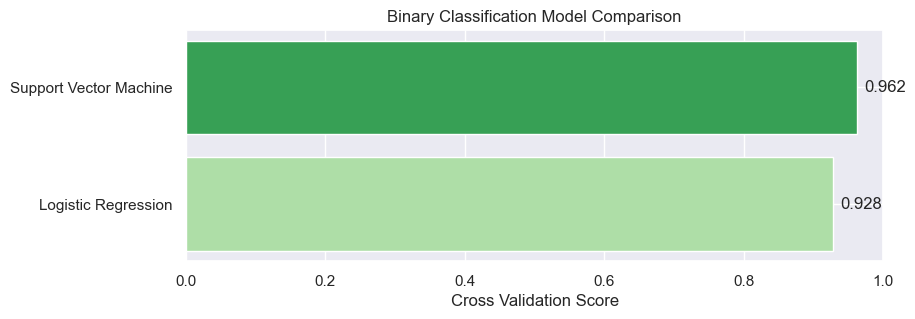

In [129]:
palette = sns.color_palette('Greens', n_colors = 2)

labels = ['Logistic Regression', 'Support Vector Machine']
scores = [cv_lr2.mean(), cv_svm2.mean()]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Cross Validation Score')
ax.set_title('Binary Classification Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()

### Random Forest Models Comparison

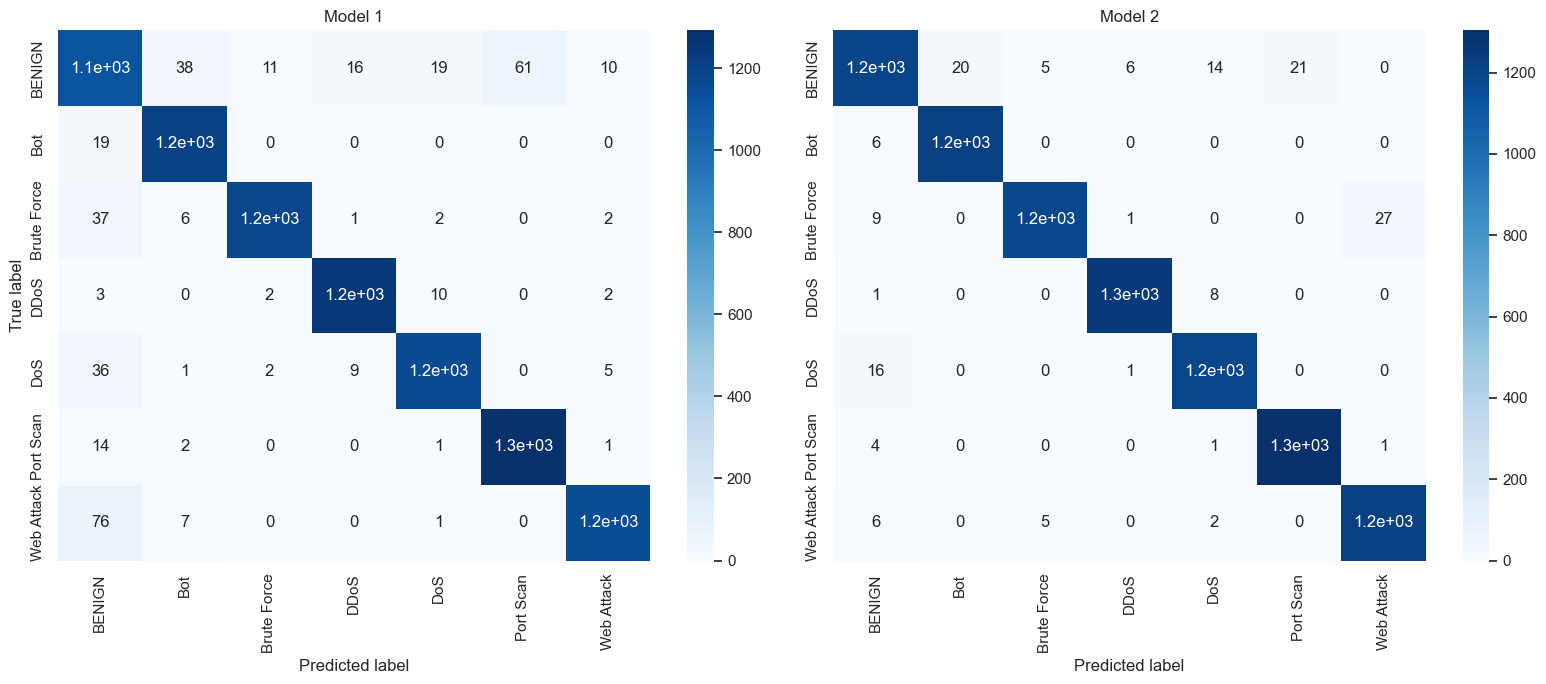

In [130]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)

conf_matrix_model1 = confusion_matrix(y_test, y_pred_rf1)
conf_matrix_model2 = confusion_matrix(y_test, y_pred_rf2)

fig, axs = plt.subplots(1, 2, figsize = (16, 7))

sns.heatmap(conf_matrix_model1, annot = True, cmap = 'Blues', ax = axs[0], xticklabels = rf1.classes_, yticklabels = rf1.classes_)
axs[0].set_title('Model 1')

sns.heatmap(conf_matrix_model2, annot = True, cmap = 'Blues', ax = axs[1], xticklabels = rf2.classes_, yticklabels = rf2.classes_)
axs[1].set_title('Model 2')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
axs[1].set_xlabel('Predicted label')

fig.tight_layout()
plt.show()

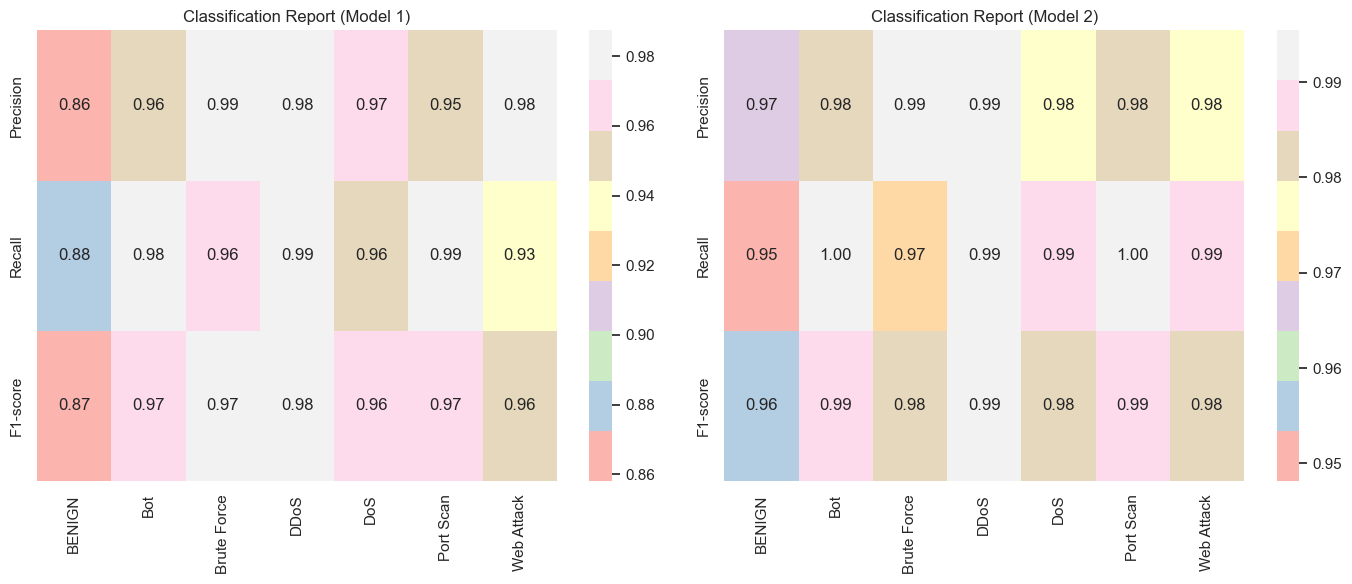

In [131]:
target_names = rf1.classes_
metrics1 = classification_report(y_true = y_test, y_pred = y_pred_rf1, target_names = target_names, output_dict = True)
precision1 = [metrics1[target_name]['precision'] for target_name in target_names]
recall1 = [metrics1[target_name]['recall'] for target_name in target_names]
f1_score1 = [metrics1[target_name]['f1-score'] for target_name in target_names]

metrics2 = classification_report(y_true = y_test, y_pred = y_pred_rf2, target_names = target_names, output_dict = True)
precision2 = [metrics2[target_name]['precision'] for target_name in target_names]
recall2 = [metrics2[target_name]['recall'] for target_name in target_names]
f1_score2 = [metrics2[target_name]['f1-score'] for target_name in target_names]

data1 = np.array([precision1, recall1, f1_score1])
data2 = np.array([precision2, recall2, f1_score2])
rows = ['Precision', 'Recall', 'F1-score']

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
sns.heatmap(data1, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[0])
sns.heatmap(data2, cmap = 'Pastel1', annot = True, fmt = '.2f', xticklabels = target_names, yticklabels = rows, ax = axs[1])
axs[0].set_title('Classification Report (Model 1)')
axs[1].set_title('Classification Report (Model 2)')
fig.tight_layout()
plt.show()

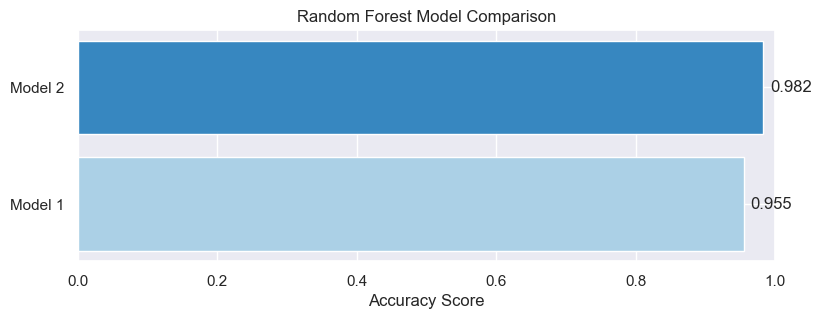

In [132]:
palette = sns.color_palette('Blues', n_colors = 2)

acc1 = accuracy_score(y_pred_rf1, y_test)
acc2 = accuracy_score(y_pred_rf2, y_test)

labels = ['Model 1', 'Model 2']
scores = [acc1, acc2]

fig, ax = plt.subplots(figsize = (9, 3))
ax.barh(labels, scores, color = palette)
ax.set_xlim([0, 1])
ax.set_xlabel('Accuracy Score')
ax.set_title('Random Forest Model Comparison')

for i, v in enumerate(scores):
    ax.text(v + 0.01, i, str(round(v, 3)), ha = 'left', va = 'center')

plt.show()